In [1]:
#getting the requirements 
import cv2 
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

In [6]:
#jpeg compression encoder
def JPEG_encoder(fileName,isGray,blockSize=64,Coeff_sent=64):
    if isGray:
      path = './Sample images/'
      full_path = os.path.join(path,fileName) 
      img = cv2.imread(full_path,cv2.IMREAD_COLOR)
      img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

      fileP = open ("JPEG_Encoded.txt","w")

      #considering -1 input to the blockSize argument as the image size
      sizeOfImg = img.shape
      if blockSize==-1:
          blockSize = sizeOfImg[0]*sizeOfImg[1]

      a = np.sqrt(blockSize)
      
      if (sizeOfImg[0]%int(a))!=0: 
        # for zero_padding in range (a-(sizeOfImg[0]%a)):
        t = np.zeros(((int(a)-(int(sizeOfImg[0])%int(a))),int(sizeOfImg[1])),dtype= np.uint8)
        img = np.vstack((img,t))
        
    

      if (sizeOfImg[1]%int(a))!=0: 
        t = np.zeros((int(img.shape[0]),(int(a)-(int(sizeOfImg[1])%int(a)))),dtype= np.uint8)
        img = np.column_stack((img,t))   
    
      #initializing a list for maintaining the starting co-ordinates of each block
      startHereList = []
      init_X=0
      init_Y=0
      

      h1 =np.ceil((int(sizeOfImg[0]))/int(a))
      w1 =np.ceil((int(sizeOfImg[1]))/int(a))
      #calculating the total number of pixels in the image
      total_pixels = sizeOfImg[0]*sizeOfImg[1]  

      #creating the list
      for val1 in range(int(h1)):
          temp=[]
          for val2 in range(int(w1)):
              temp.append((init_X,init_Y))
              init_Y = init_Y + a
          startHereList.append(temp)
          init_Y = 0
          init_X = init_X + a

      Q_matrix = np.array([[16 ,11 ,10 ,16 ,24 ,40 ,51 ,61],
                                    [12 ,12 ,14 ,19 ,26 ,58 ,60 ,55],
                                    [14 ,13 ,16 ,24 ,40 ,57 ,69 ,56],
                                    [14 ,17 ,22 ,29 ,51 ,87 ,80 ,62],
                                    [18 ,22 ,37 ,56 ,68 ,109 ,103 ,77],
                                    [24 ,35 ,55 ,64 ,81 ,104 ,113 ,92],
                                    [49 ,64 ,78 ,87 ,103 ,121 ,120 ,101],
                                    [72 ,92 ,95 ,98 ,112 ,100 ,103 ,99]])

      Q_matrix = Q_matrix.astype(np.uint8)
      Q_matrix = cv2.resize(Q_matrix,(int(a),int(a)), interpolation = cv2.INTER_LINEAR)

      for v1 in range(int(h1)):
          for v2 in range(int(w1)):
            start = startHereList[v1][v2]
            subImage = np.zeros((int(a),int(a)))
            for i in range(int(a)):
                row = np.zeros((1,int(a)))
                for j in range(int(a)):
                  row[0][j] = img[int(start[0])+i][int(start[1])+j]
                subImage[i] = row   
            
            subImage = subImage - 128
            
            #  img_a = np.float32(subImage)/255.0  # float conversion/scale
            dct_a = cv2.dct(subImage)              # the dct
            # subimg_reconstructed = np.int8(dct_a*255.0)    # convert back to int
            
            quantised_Yarr = np.divide(dct_a,Q_matrix)  
            rounded_Yarr = np.round_(quantised_Yarr)
            
            #  zigzag(a,rounded_Yarr)
            i=0
            j=0 
            goRight = True
            size = 0
            array_of_codes = []
            while i<int(a) and j<int(a) and i>=0 and j>=0:
                if size>=Coeff_sent:
                   array_of_codes.append(0)
                  # fileP.write('0')
                else:
                   array_of_codes.append(int(rounded_Yarr[i][j]))
                  # fileP.write(str(int(rounded_Yarr[i][j])))
                # fileP.write(" ")
                size = size +1
                if goRight:
                  if i-1<0 and j+1<int(a):
                    j=j+1
                    goRight = False
                  else: 
                    if i-1>=0 and j+1<int(a):
                      i= i-1
                      j =j+1 
                      goRight = True
                    else:
                      if j+1>=int(a):
                          i = i +1
                          goRight = False
                else:
                  if i+1<int(a) and j-1<0:
                    i=i+1
                    goRight = True
                  else: 
                    if i+1<int(a) and j-1>=0:
                      j= j-1
                      i =i+1 
                      goRight = False
                    else:
                      if i+1>=int(a):
                          j = j +1
                          goRight = True
            
            end = 1
            for num in range(blockSize):
               if array_of_codes[blockSize-1-num]!=0:
                  end = blockSize-num+1
                  break
            # total_codes = total_codes + end
            for num1 in range(end):
               fileP.write(str(array_of_codes[num1]))
               fileP.write(" ")
            fileP.write("\n")
    
    else:  
      path = './Sample images/'
      full_path = os.path.join(path,fileName) 
      img = cv2.imread(full_path,cv2.IMREAD_COLOR)
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      
      fileP = open ("JPEG_Encoded.txt","w")

      #considering -1 input to the blockSize argument as the image size
      sizeOfImg = img.shape
      if blockSize==-1:
          blockSize = sizeOfImg[0]*sizeOfImg[1]

      img_YUV = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)

      a = np.sqrt(blockSize)
      
      if (sizeOfImg[0]%int(a))!=0: 
        # for zero_padding in range (a-(sizeOfImg[0]%a)):
        t = np.zeros(((int(a)-(int(sizeOfImg[0])%int(a))),int(sizeOfImg[1]),3),dtype= np.uint8)
        img_YUV = np.vstack((img_YUV,t))
        
    

      if (sizeOfImg[1]%int(a))!=0: 
        t = np.zeros((int(img_YUV.shape[0]),(int(a)-(int(sizeOfImg[1])%int(a))),3),dtype= np.uint8)
        img_YUV = np.column_stack((img_YUV,t))   
    
      #initializing a list for maintaining the starting co-ordinates of each block
      startHereList = []
      init_X=0
      init_Y=0
      

      h1 =np.ceil((int(sizeOfImg[0]))/int(a))
      w1 =np.ceil((int(sizeOfImg[1]))/int(a))
      #calculating the total number of pixels in the image
      total_pixels = (sizeOfImg[0]*sizeOfImg[1]*sizeOfImg[2])  
      total_codes = 0 
      #creating the list
      for val1 in range(int(h1)):
          temp=[]
          for val2 in range(int(w1)):
              temp.append((init_X,init_Y))
              init_Y = init_Y + a
          startHereList.append(temp)
          init_Y = 0
          init_X = init_X + a

      Q_matrix_Luminance = np.array([[16 ,11 ,10 ,16 ,24 ,40 ,51 ,61],
                                    [12 ,12 ,14 ,19 ,26 ,58 ,60 ,55],
                                    [14 ,13 ,16 ,24 ,40 ,57 ,69 ,56],
                                    [14 ,17 ,22 ,29 ,51 ,87 ,80 ,62],
                                    [18 ,22 ,37 ,56 ,68 ,109 ,103 ,77],
                                    [24 ,35 ,55 ,64 ,81 ,104 ,113 ,92],
                                    [49 ,64 ,78 ,87 ,103 ,121 ,120 ,101],
                                    [72 ,92 ,95 ,98 ,112 ,100 ,103 ,99]])

      Q_matrix_Chrominance = np.array([[17 ,18 ,24 ,47 ,99 ,99 ,99 ,99],
                                    [18 ,21 ,26 ,66 ,99 ,99 ,99 ,99],
                                    [24 ,26 ,56 ,99 ,99 ,99 ,99 ,99],
                                    [47 ,66 ,99 ,99 ,99 ,99 ,99 ,99],
                                    [99 ,99 ,99 ,99 ,99 ,99 ,99 ,99],
                                    [99 ,99 ,99 ,99 ,99 ,99 ,99 ,99],
                                    [99 ,99 ,99 ,99 ,99 ,99 ,99 ,99],
                                    [99 ,99 ,99 ,99 ,99 ,99 ,99 ,99]])


      Q_matrix_Chrominance =Q_matrix_Chrominance.astype(np.uint8)
      Q_matrix_Luminance = Q_matrix_Luminance.astype(np.uint8)
      Q_matrix_Chrominance = cv2.resize(Q_matrix_Chrominance,(int(a),int(a)),interpolation = cv2.INTER_LINEAR)
      Q_matrix_Luminance = cv2.resize(Q_matrix_Luminance,(int(a),int(a)), interpolation = cv2.INTER_LINEAR)
      
      for v1 in range(int(h1)):
          for v2 in range(int(w1)):
            start = startHereList[v1][v2]
            subImage = np.zeros((int(a),int(a)))
            for i in range(int(a)):
                row = np.zeros((1,int(a)))
                for j in range(int(a)):
                  row[0][j] = img_YUV[int(start[0])+i][int(start[1])+j][0]
                subImage[i] = row   
            
            subImage = subImage - 128
            
            #  img_a = np.float32(subImage)/255.0  # float conversion/scale
            dct_a = cv2.dct(subImage)              # the dct
            # subimg_reconstructed = np.int8(dct_a*255.0)    # convert back to int
            
            quantised_Yarr = np.divide(dct_a,Q_matrix_Luminance)  
            rounded_Yarr = np.round_(quantised_Yarr)
            
            #  zigzag(a,rounded_Yarr)
            i=0
            j=0 
            goRight = True
            size = 0
            array_of_codes = []
            while i<int(a) and j<int(a) and i>=0 and j>=0:
                if size>=Coeff_sent:
                  array_of_codes.append(0)
                  # fileP.write(str('0'))
                else:
                  array_of_codes.append((int(rounded_Yarr[i][j])))
                  # fileP.write(str(int(rounded_Yarr[i][j])))
                size = size +1
                # fileP.write(" ")
                if goRight:
                  if i-1<0 and j+1<int(a):
                    j=j+1
                    goRight = False
                  else: 
                    if i-1>=0 and j+1<int(a):
                      i= i-1
                      j =j+1 
                      goRight = True
                    else:
                      if j+1>=int(a):
                          i = i +1
                          goRight = False
                else:
                  if i+1<int(a) and j-1<0:
                    i=i+1
                    goRight = True
                  else: 
                    if i+1<int(a) and j-1>=0:
                      j= j-1
                      i =i+1 
                      goRight = False
                    else:
                      if i+1>=int(a):
                          j = j +1
                          goRight = True
            end = 1
            for num in range(blockSize):
               if array_of_codes[blockSize-1-num]!=0:
                  end = blockSize-num+1
                  break
            # total_codes = total_codes + end
            for num1 in range(end):
               fileP.write(str(array_of_codes[num1]))
               fileP.write(" ")
            fileP.write("\n")
            
            
      for v1 in range(int(h1)):
          for v2 in range(int(w1)):
            start = startHereList[v1][v2]
            subImage = np.zeros((int(a),int(a)))
            for i in range(int(a)):
                row = np.zeros((1,int(a)))
                for j in range(int(a)):
                  row[0][j] = img_YUV[int(start[0])+i][int(start[1])+j][1]
                subImage[i] = row   
            
            subImage = subImage - 128
            
            #  img_a = np.float32(subImage)/255.0  # float conversion/scale
            dct_a = cv2.dct(subImage)              # the dct
            # subimg_reconstructed = np.int8(dct_a*255.0)    # convert back to int
            
            quantised_Yarr = np.divide(dct_a,Q_matrix_Chrominance)  
            rounded_Yarr = np.round_(quantised_Yarr)
            
            #  zigzag(a,rounded_Yarr)
            i=0
            j=0 
            goRight = True
            size = 0
            array_of_codes = []
            while i<int(a) and j<int(a) and i>=0 and j>=0:
                if size>=Coeff_sent:
                   array_of_codes.append(0)
                  # fileP.write('0')
                else:
                  array_of_codes.append((int(rounded_Yarr[i][j])))
                  # fileP.write(str(int(rounded_Yarr[i][j])))
                # fileP.write(" ")
                size = size +1
                if goRight:
                  if i-1<0 and j+1<int(a):
                    j=j+1
                    goRight = False
                  else: 
                    if i-1>=0 and j+1<int(a):
                      i= i-1
                      j =j+1 
                      goRight = True
                    else:
                      if j+1>=int(a):
                          i = i +1
                          goRight = False
                else:
                  if i+1<int(a) and j-1<0:
                    i=i+1
                    goRight = True
                  else: 
                    if i+1<int(a) and j-1>=0:
                      j= j-1
                      i =i+1 
                      goRight = False
                    else:
                      if i+1>=int(a):
                          j = j +1
                          goRight = True
            # fileP.write("\n")
            
            
            end = 1
            for num in range(blockSize):
               if array_of_codes[blockSize-1-num]!=0:
                  end = blockSize-num+1
                  break
            # total_codes = total_codes + end
            for num1 in range(end):
               fileP.write(str(array_of_codes[num1]))
               fileP.write(" ")
            fileP.write("\n")


      for v1 in range(int(h1)):
          for v2 in range(int(w1)):
            start = startHereList[v1][v2]
            subImage = np.zeros((int(a),int(a)))
            for i in range(int(a)):
                row = np.zeros((1,int(a)))
                for j in range(int(a)):
                  row[0][j] = img_YUV[int(start[0])+i][int(start[1])+j][2]
                subImage[i] = row   
            
            subImage = subImage - 128
            
            #  img_a = np.float32(subImage)/255.0  # float conversion/scale
            dct_a = cv2.dct(subImage)              # the dct
            # subimg_reconstructed = np.int8(dct_a*255.0)    # convert back to int
            
            quantised_Yarr = np.divide(dct_a,Q_matrix_Chrominance)  
            rounded_Yarr = np.round_(quantised_Yarr)
            
            #  zigzag(a,rounded_Yarr)
            i=0
            j=0 
            goRight = True
            size = 0
            array_of_codes = []
            while i<int(a) and j<int(a) and i>=0 and j>=0:
                if size>=Coeff_sent:
                   array_of_codes.append(0) 
                  # fileP.write('0')
                else:
                   array_of_codes.append((int(rounded_Yarr[i][j])))
                  # fileP.write(str(int(rounded_Yarr[i][j])))
                # fileP.write(" ")
                size = size +1
                if goRight:
                  if i-1<0 and j+1<int(a):
                    j=j+1
                    goRight = False
                  else: 
                    if i-1>=0 and j+1<int(a):
                      i= i-1
                      j =j+1 
                      goRight = True
                    else:
                      if j+1>=int(a):
                          i = i +1
                          goRight = False
                else:
                  if i+1<int(a) and j-1<0:
                    i=i+1
                    goRight = True
                  else: 
                    if i+1<int(a) and j-1>=0:
                      j= j-1
                      i =i+1 
                      goRight = False
                    else:
                      if i+1>=int(a):
                          j = j +1
                          goRight = True
            # fileP.write("\n")


            end = 1
            for num in range(blockSize):
               if array_of_codes[blockSize-1-num]!=0:
                  end = blockSize-num+1
                  break
            # total_codes = total_codes + end
            for num1 in range(end):
               fileP.write(str(array_of_codes[num1]))
               fileP.write(" ")
            fileP.write("\n")                                    

In [7]:
#jpeg compression decoder
def JPEG_decoder(fileName,filea,isGray,blockSize=64,Coeff_sent=64):
    if isGray:
      path = './Sample images/'
      full_path = os.path.join(path,fileName) 
      img = cv2.imread(full_path,cv2.IMREAD_COLOR)


      img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

      plt.subplot(1,2,1);plt.imshow(img,cmap='gray');plt.title('Original Image')
      fileP1 = open (filea,"r")

      #considering -1 input to the blockSize argument as the image size
      sizeOfImg = img.shape
      if blockSize==-1:
          blockSize = sizeOfImg[0]*sizeOfImg[1]

      a = np.sqrt(blockSize)
      
      Reconstructed_img = np.zeros((img.shape))

      #initializing a list for maintaining the starting co-ordinates of each block
      startHereList = []
      init_X=0
      init_Y=0
      

      h1 =np.ceil((int(sizeOfImg[0]))/int(a))
      w1 =np.ceil((int(sizeOfImg[1]))/int(a))
      #calculating the total number of pixels in the image
      total_pixels = sizeOfImg[0]*sizeOfImg[1] 
      total_codes = 0 

      #creating the list
      for val1 in range(int(h1)):
          temp=[]
          for val2 in range(int(w1)):
              temp.append((init_X,init_Y))
              init_Y = init_Y + a
          startHereList.append(temp)
          init_Y = 0
          init_X = init_X + a
      #standard quantisation matrix
      Q_matrix = np.array([[16 ,11 ,10 ,16 ,24 ,40 ,51 ,61],
                                    [12 ,12 ,14 ,19 ,26 ,58 ,60 ,55],
                                    [14 ,13 ,16 ,24 ,40 ,57 ,69 ,56],
                                    [14 ,17 ,22 ,29 ,51 ,87 ,80 ,62],
                                    [18 ,22 ,37 ,56 ,68 ,109 ,103 ,77],
                                    [24 ,35 ,55 ,64 ,81 ,104 ,113 ,92],
                                    [49 ,64 ,78 ,87 ,103 ,121 ,120 ,101],
                                    [72 ,92 ,95 ,98 ,112 ,100 ,130 ,99]])
      #resizing the qmatrix according to the block size
      Q_matrix = Q_matrix.astype(np.uint8)
      Q_matrix = cv2.resize(Q_matrix,(int(a),int(a)), interpolation = cv2.INTER_LINEAR)

      #traversing each block
      for v1 in range(int(h1)):
          for v2 in range(int(w1)):
            start = startHereList[v1][v2]
            newLine = fileP1.readline()      #reading the line in the input file containing the codes for the block
            arrayOfCode = list((int(n) for n in newLine.split())) #creating an array for all the codes
            
            total_codes = total_codes + len(arrayOfCode)
            Decoded_subImage = np.zeros((int(a),int(a)))  
              
            i=0
            j=0 
            goRight = True
            index_of_bitstream =0 
            end = len(arrayOfCode)
            #zig zag traversal
            while i<int(a) and j<int(a) and i>=0 and j>=0:
                if index_of_bitstream>=end:
                   Decoded_subImage[i][j] = 0
                else:
                  Decoded_subImage[i][j] = arrayOfCode[index_of_bitstream]
                index_of_bitstream = index_of_bitstream +1
                if goRight:
                  if i-1<0 and j+1<int(a):
                    j=j+1
                    goRight = False
                  else: 
                    if i-1>=0 and j+1<int(a):
                      i= i-1
                      j =j+1 
                      goRight = True
                    else:
                      if j+1>=int(a):
                          i = i +1
                          goRight = False
                      else:
                        break
                else:
                  if i+1<int(a) and j-1<0:
                    i=i+1
                    goRight = True
                  else: 
                    if i+1<int(a) and j-1>=0:
                      j= j-1
                      i =i+1 
                      goRight = False
                    else:
                      if i+1>=int(a):
                          j = j +1
                          goRight = True
                      else:
                        break
            #dequantisation
            dequantised_Yarr = np.multiply(Decoded_subImage,Q_matrix)
            
            idct_a = cv2.idct(dequantised_Yarr)              # the idct
            subimg_reconstructed = np.int8(idct_a)    # convert to int
            subimg_reconstructed = subimg_reconstructed + 128
            
            #assigning recovered pixel values to the image
            for i in range(int(a)):
              for j in range(int(a)):
                if (int(start[0])+i)<sizeOfImg[0] and (int(start[1])+j)<sizeOfImg[1]:
                  if(int(subimg_reconstructed[i][j])>255):
                     Reconstructed_img[int(start[0])+i][int(start[1])+j] = 255
                  Reconstructed_img[int(start[0])+i][int(start[1])+j] = int(subimg_reconstructed[i][j])
       
      plt.subplot(1,2,2);plt.imshow(Reconstructed_img,cmap='gray');plt.title('JPEG Decoded')

      print("RMSE: {}".format(np.sqrt(np.mean(np.square(Reconstructed_img-img)**2))))
      print("PSNR: {}".format((20*(np.log10(255)))-(10*(np.log10((np.mean(np.square(Reconstructed_img-img)**2)))))))
      print("Compression Ratio: {}".format(total_pixels/total_codes))
      
    else:    
      path = './Sample images/'
      full_path = os.path.join(path,fileName) 
      img = cv2.imread(full_path,cv2.IMREAD_COLOR)
      img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
      plt.subplot(1,2,1);plt.imshow(img);plt.title('Original Image')
      fileP1 = open (filea,"r")

      #considering -1 input to the blockSize argument as the image size
      sizeOfImg = img.shape
      if blockSize==-1:
          blockSize = sizeOfImg[0]*sizeOfImg[1]

      a = np.sqrt(blockSize)
      
      Reconstructed_img = np.zeros((img.shape))
    
      #initializing a list for maintaining the starting co-ordinates of each block
      startHereList = []
      init_X=0
      init_Y=0
      
      
      h1 =np.ceil((int(sizeOfImg[0]))/int(a))
      w1 =np.ceil((int(sizeOfImg[1]))/int(a))
      #calculating the total number of pixels in the image
      total_pixels = (sizeOfImg[0]*sizeOfImg[1]*sizeOfImg[2])  
      total_codes = 0
      #creating the list
      for val1 in range(int(h1)):
          temp=[]
          for val2 in range(int(w1)):
              temp.append((init_X,init_Y))
              init_Y = init_Y + a
          startHereList.append(temp)
          init_Y = 0
          init_X = init_X + a

      Q_matrix_Luminance = np.array([[16 ,11 ,10 ,16 ,24 ,40 ,51 ,61],
                                    [12 ,12 ,14 ,19 ,26 ,58 ,60 ,55],
                                    [14 ,13 ,16 ,24 ,40 ,57 ,69 ,56],
                                    [14 ,17 ,22 ,29 ,51 ,87 ,80 ,62],
                                    [18 ,22 ,37 ,56 ,68 ,109 ,103 ,77],
                                    [24 ,35 ,55 ,64 ,81 ,104 ,113 ,92],
                                    [49 ,64 ,78 ,87 ,103 ,121 ,120 ,101],
                                    [72 ,92 ,95 ,98 ,112 ,100 ,130 ,99]])

      Q_matrix_Chrominance = np.array([[17 ,18 ,24 ,47 ,99 ,99 ,99 ,99],
                                    [18 ,21 ,26 ,66 ,99 ,99 ,99 ,99],
                                    [24 ,26 ,56 ,99 ,99 ,99 ,99 ,99],
                                    [47 ,66 ,99 ,99 ,99 ,99 ,99 ,99],
                                    [99 ,99 ,99 ,99 ,99 ,99 ,99 ,99],
                                    [99 ,99 ,99 ,99 ,99 ,99 ,99 ,99],
                                    [99 ,99 ,99 ,99 ,99 ,99 ,99 ,99],
                                    [99 ,99 ,99 ,99 ,99 ,99 ,99 ,99]])
      
      #resizing the q-matrix according to the block size
      Q_matrix_Chrominance =Q_matrix_Chrominance.astype(np.uint8)
      Q_matrix_Luminance = Q_matrix_Luminance.astype(np.uint8)

      Q_matrix_Chrominance = cv2.resize(Q_matrix_Chrominance,(int(a),int(a)),interpolation = cv2.INTER_LINEAR)
      Q_matrix_Luminance = cv2.resize(Q_matrix_Luminance,(int(a),int(a)), interpolation = cv2.INTER_LINEAR)

      #traversing the block for Y channel
      for v1 in range(int(h1)):
          for v2 in range(int(w1)):
            start = startHereList[v1][v2]
            newLine = fileP1.readline()      #reading the line in the input file containing the codes for the block
            arrayOfCode = list((int(n) for n in newLine.split())) #creating an array for all the codes
            
            total_codes = total_codes + len(arrayOfCode)
            
            Decoded_subImage = np.zeros((int(a),int(a)))  
              
            i=0
            j=0 
            goRight = True
            index_of_bitstream =0 
            end = len(arrayOfCode)
            #zig zag traversal 
            while i<int(a) and j<int(a) and i>=0 and j>=0:
                if index_of_bitstream>=end:
                   Decoded_subImage[i][j] = 0
                else:
                  Decoded_subImage[i][j] = arrayOfCode[index_of_bitstream]
                index_of_bitstream = index_of_bitstream +1
                if goRight:
                  if i-1<0 and j+1<int(a):
                    j=j+1
                    goRight = False
                  else: 
                    if i-1>=0 and j+1<int(a):
                      i= i-1
                      j =j+1 
                      goRight = True
                    else:
                      if j+1>=int(a):
                          i = i +1
                          goRight = False
                else:
                  if i+1<int(a) and j-1<0:
                    i=i+1
                    goRight = True
                  else: 
                    if i+1<int(a) and j-1>=0:
                      j= j-1
                      i =i+1 
                      goRight = False
                    else:
                      if i+1>=int(a):
                          j = j +1
                          goRight = True
            
            #dequantisation
            dequantised_Yarr = np.multiply(Decoded_subImage,Q_matrix_Luminance)
            
            idct_a = cv2.idct(dequantised_Yarr)              # the idct
            subimg_reconstructed = np.int8(idct_a)    # convert to int
            subimg_reconstructed = subimg_reconstructed + 128
            #assigning pixel values 
            for i in range(int(a)):
              for j in range(int(a)):
                if (int(start[0])+i)<sizeOfImg[0] and (int(start[1])+j)<sizeOfImg[1]:
                    Reconstructed_img[int(start[0])+i][int(start[1])+j][0] = int(subimg_reconstructed[i][j])

     #traversing the Cr channel
      for v1 in range(int(h1)):
          for v2 in range(int(w1)):
            start = startHereList[v1][v2]
            newLine = fileP1.readline()      #reading the line in the input file containing the codes for the block
            arrayOfCode = list((int(n) for n in newLine.split())) #creating an array for all the codes
            

            total_codes = total_codes + len(arrayOfCode)
            Decoded_subImage = np.zeros((int(a),int(a)))  
              
            i=0
            j=0 
            goRight = True
            index_of_bitstream =0 
            #zig zag traversal
            end  = len(arrayOfCode)
            while i<int(a) and j<int(a) and i>=0 and j>=0:
                if index_of_bitstream>=end:
                   Decoded_subImage[i][j] = 0
                else:
                  Decoded_subImage[i][j] = arrayOfCode[index_of_bitstream]
                index_of_bitstream = index_of_bitstream +1
                if goRight:
                  if i-1<0 and j+1<int(a):
                    j=j+1
                    goRight = False
                  else: 
                    if i-1>=0 and j+1<int(a):
                      i= i-1
                      j =j+1 
                      goRight = True
                    else:
                      if j+1>=int(a):
                          i = i +1
                          goRight = False
                else:
                  if i+1<int(a) and j-1<0:
                    i=i+1
                    goRight = True
                  else: 
                    if i+1<int(a) and j-1>=0:
                      j= j-1
                      i =i+1 
                      goRight = False
                    else:
                      if i+1>=int(a):
                          j = j +1
                          goRight = True
            #dequantisation
            dequantised_Yarr = np.multiply(Decoded_subImage,Q_matrix_Chrominance)
            
            idct_a = cv2.idct(dequantised_Yarr)              # the idct
            subimg_reconstructed = np.int8(idct_a)    # convert  to int
            subimg_reconstructed = subimg_reconstructed + 128
            #assigning the pixel values
            for i in range(int(a)):
              for j in range(int(a)):
                Reconstructed_img[int(start[0])+i][int(start[1])+j][1] = int(subimg_reconstructed[i][j])
      
      #traversing the Cb channel
      for v1 in range(int(h1)):
          for v2 in range(int(w1)):
            start = startHereList[v1][v2]
            newLine = fileP1.readline()      #reading the line in the input file containing the codes for the block
            arrayOfCode = list((int(n) for n in newLine.split())) #creating an array for all the codes
            

            total_codes = total_codes +len(arrayOfCode)
            Decoded_subImage = np.zeros((int(a),int(a)))  
              
            i=0
            j=0 
            goRight = True
            index_of_bitstream =0 
            end = len(arrayOfCode)
            #zig zag traversal
            while i<int(a) and j<int(a) and i>=0 and j>=0:
                if index_of_bitstream>=end:
                   Decoded_subImage[i][j] = 0
                else:
                  Decoded_subImage[i][j] = arrayOfCode[index_of_bitstream]
                index_of_bitstream = index_of_bitstream +1
                if goRight:
                  if i-1<0 and j+1<int(a):
                    j=j+1
                    goRight = False
                  else: 
                    if i-1>=0 and j+1<int(a):
                      i= i-1
                      j =j+1 
                      goRight = True
                    else:
                      if j+1>=int(a):
                          i = i +1
                          goRight = False
                else:
                  if i+1<int(a) and j-1<0:
                    i=i+1
                    goRight = True
                  else: 
                    if i+1<int(a) and j-1>=0:
                      j= j-1
                      i =i+1 
                      goRight = False
                    else:
                      if i+1>=int(a):
                          j = j +1
                          goRight = True
            #dequantisation
            dequantised_Yarr = np.multiply(Decoded_subImage,Q_matrix_Chrominance)
            
            idct_a = cv2.idct(dequantised_Yarr)              # the idct
            subimg_reconstructed = np.int8(idct_a)    # convert to int
            subimg_reconstructed = subimg_reconstructed + 128
            
            #assigning the pixel values
            for i in range(int(a)):
              for j in range(int(a)):
                Reconstructed_img[int(start[0])+i][int(start[1])+j][2] = int(subimg_reconstructed[i][j])
     
      
      b = (Reconstructed_img).astype(np.uint8)
      #converting to RGB
      a = cv2.cvtColor(b,cv2.COLOR_YCrCb2RGB)    
      plt.subplot(1,2,2);plt.imshow(a);plt.title('JPEG Decoded')
   
      print("RMSE: {}".format(np.sqrt(np.mean(np.square(a-img)**2))))
      print("PSNR: {}".format(cv2.PSNR(a,img)))
      print("Compression Ratio: {}".format(total_pixels/total_codes))


In [8]:
JPEG_encoder('kodim04.png',False,256,1)

RMSE: 7.044341893992319
PSNR: 22.88666927522759
Compression Ratio: 128.55797733217088


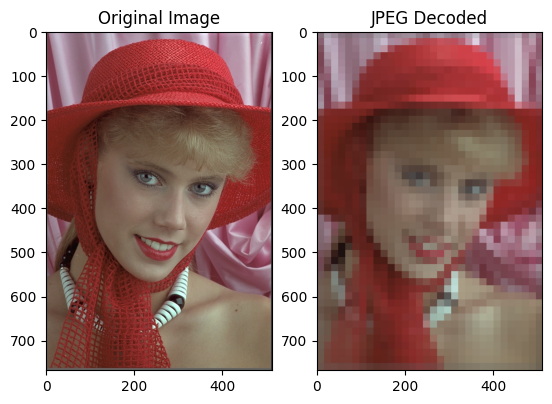

In [9]:
JPEG_decoder('kodim04.png','JPEG_Encoded.txt',False,256,1)